In [ ]:
# KNN
# KNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure.
# KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.
# Algorithm:
# 1. Load the data
# 2. Initialize K to your chosen number of neighbors
# 3. For each example in the data
#     3.1 Calculate the distance between the query example and the current example from the data.
#     3.2 Add the distance and the index of the example to an ordered collection
# 4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
# 5. Pick the first K entries from the sorted collection
# 6. Get the labels of the selected K entries
# 7. If regression, return the mean of the K labels
# 8. If classification, return the mode of the K labels

In [1]:
# KNN Using Iris Dataset

# Importing Libraries
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

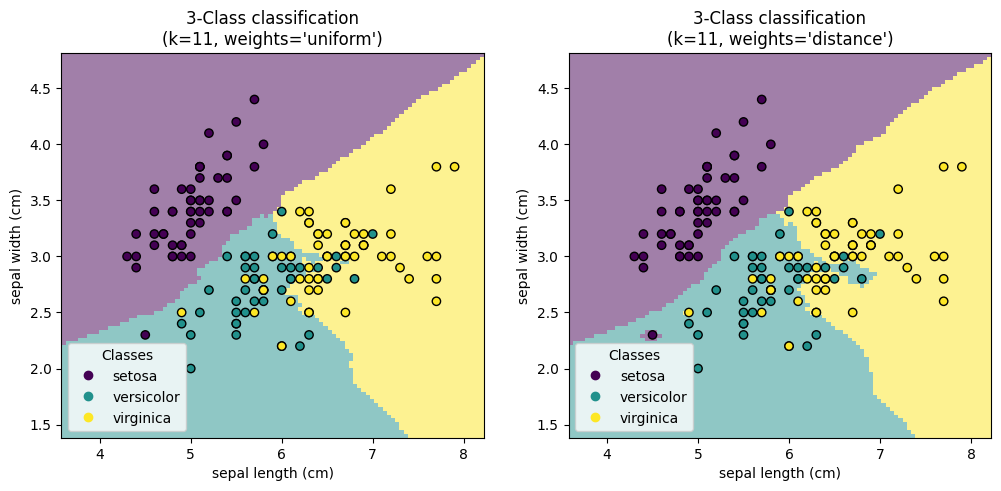

In [7]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()